In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings (bad practice)
warnings.filterwarnings('ignore')
# load data (unzipped)
base = pd.read_json('data/data.json')

In [2]:
# describe data (count, mean, std, max, etc...)
base.describe()

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,...,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude
count,1.433700e+04,14337.000000,14337.000000,14321.000000,1.433700e+04,1.433700e+04,1.423800e+04,1.433700e+04,14337.000000,14337.000000,...,14278.000000,14278.000000,14182.000000,14337.000000,14337.000000,14337.000000,1.433700e+04,14337.000000,13261.000000,13261.000000
mean,1.350933e+09,3672.521936,6.176676,0.439564,1.345825e+09,1.350501e+09,1.340854e+09,1.350205e+09,0.127433,2430.231492,...,7.974436,4.306976,46.869694,50.576759,0.844179,374.226547,1.313492e+09,2.711097,35.221736,-59.490368
std,2.401300e+07,5758.113003,3.860333,0.591487,2.404107e+07,2.401299e+07,8.750386e+07,2.398787e+07,0.333468,9142.308260,...,11.761241,6.011520,54.825253,59.678090,0.362698,418.593616,4.152174e+07,1.606726,20.207588,66.569034
min,1.171256e+09,0.000000,0.000000,0.000000,1.170332e+09,1.170824e+09,0.000000e+00,1.170819e+09,0.000000,0.000000,...,0.000000,0.000000,-1094.000000,-1094.000000,0.000000,0.000000,1.011210e+09,1.000000,-45.045208,-159.390183
25%,1.334221e+09,750.000000,5.000000,0.000000,1.329754e+09,1.333789e+09,1.329499e+09,1.333406e+09,0.000000,116.410000,...,0.000000,0.000000,16.000000,17.000000,1.000000,13.000000,1.286824e+09,1.000000,33.959338,-96.957828
50%,1.355805e+09,1990.000000,6.000000,0.000000,1.351043e+09,1.355373e+09,1.351099e+09,1.355000e+09,0.000000,431.930000,...,0.000000,0.000000,32.000000,35.000000,1.000000,242.000000,1.316636e+09,3.000000,39.974104,-79.425579
75%,1.370646e+09,4280.000000,8.000000,1.000000,1.365346e+09,1.370214e+09,1.365478e+09,1.370048e+09,0.000000,1547.260000,...,14.000000,11.000000,59.000000,63.000000,1.000000,603.000000,1.346790e+09,3.000000,44.857040,-3.187449
max,1.523488e+09,65535.000000,13.000000,3.000000,1.382012e+09,1.523056e+09,1.381608e+09,1.418850e+09,1.000000,306293.930000,...,91.000000,34.000000,980.000000,980.000000,1.000000,3794.000000,1.381543e+09,103.000000,64.844022,176.169492


In [3]:
# info of data (column names,lengths, types, etc...)
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [4]:
# johns line , fraud == 1
base[ 'fraud' ] = base[ 'acct_type' ].apply( lambda x: x[:5] ) == 'fraud'

In [5]:
# new dataframe of my 11 columns + fraud column
winstons_11_columns = [ 'event_published' , 'event_start' , 'fb_published' , 'gts' , 
                       'has_analytics' , 'has_header' , 'has_logo' , 'listed' , 'name' , 
                       'name_length' , 'num_order' , 'fraud' ]
winstons_11 = base[ winstons_11_columns ] # figure out how to print like this displays in ipynb in a py3 file w/ print() e.g. ?print(winstons_11)?
winstons_11

,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,fraud
0,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,True
1,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,False
2,1.291092e+09,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,False
3,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,False
4,1.291995e+09,1297440000,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,False
5,1.294422e+09,1300053600,0,302.57,0,0.0,1,y,Bluegrass Stallions vs Rochester Razorsharks,44,14,False
6,1.294425e+09,1297468800,0,832.64,0,1.0,1,y,Fridays at Four Frederick 2011-02-11,36,12,False
7,1.294428e+09,1296271800,0,220.64,0,0.0,1,y,When Jekyll Met Hyde (1960s),28,6,False
8,1.294880e+09,1297737000,1,3706.36,0,0.0,1,y,A Sweetheart Affair,19,12,False
9,1.294428e+09,1296876600,0,535.84,0,0.0,1,y,When Jekyll Met Hyde (1950s),28,14,False


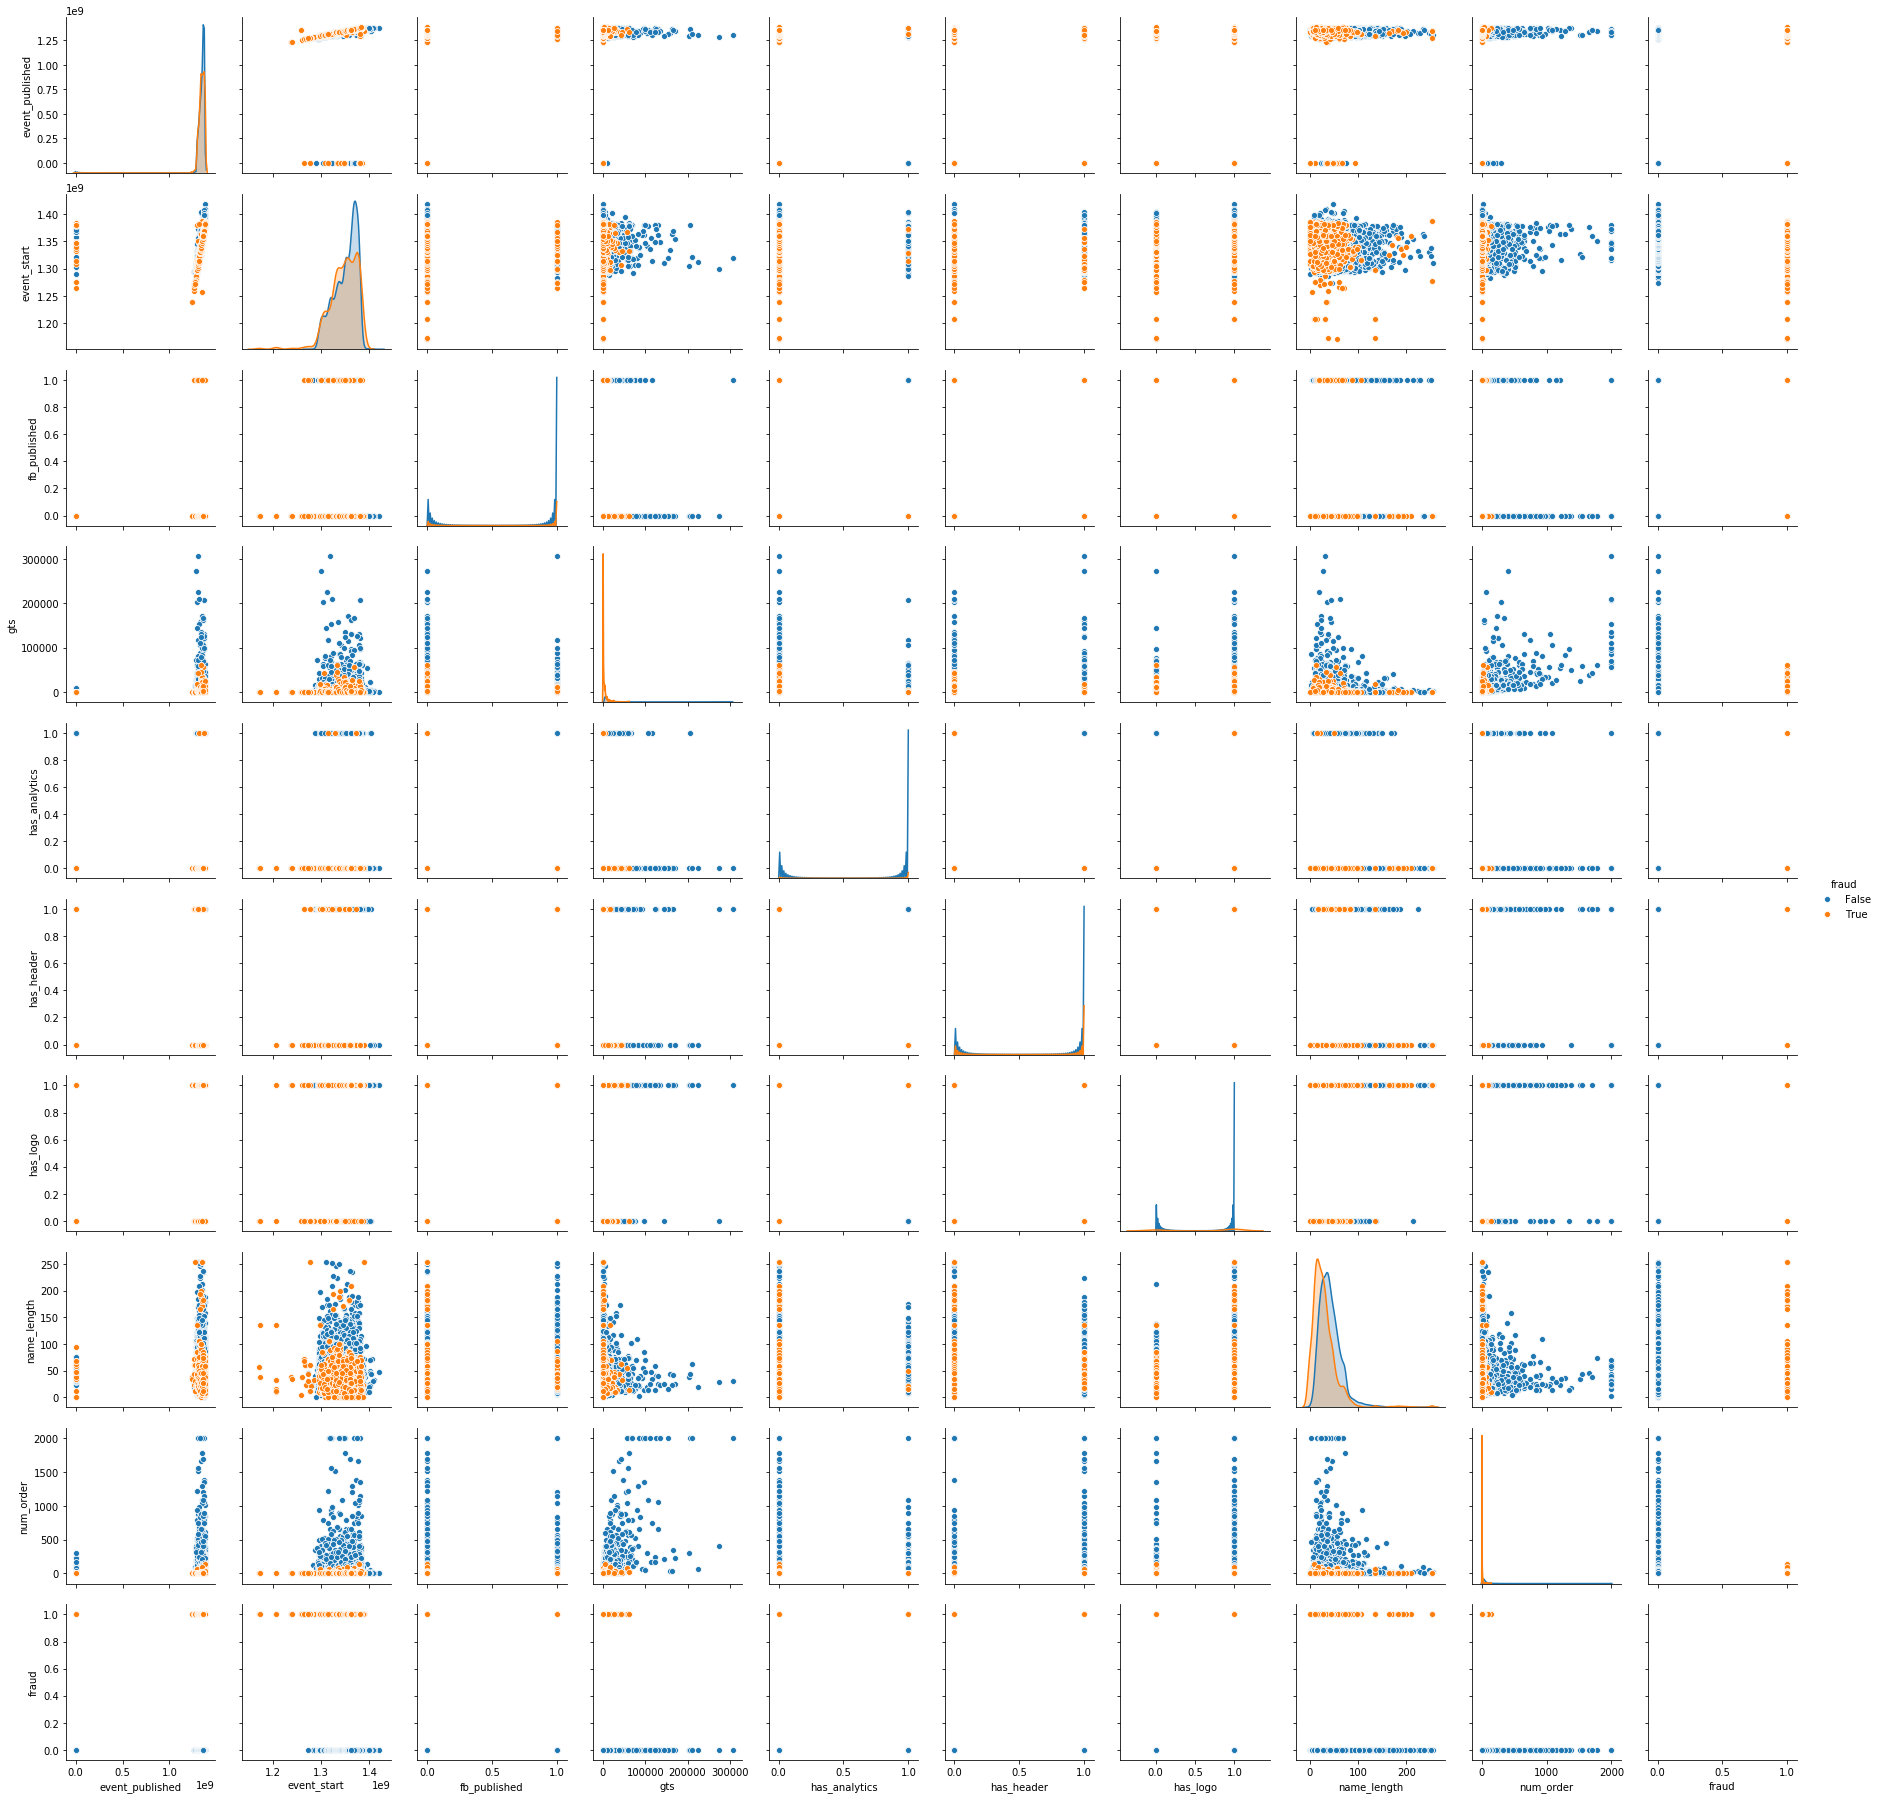

In [6]:
# plot pairplot filtered vs fraud cases (base['fraud'])
w_11_pairplot_vs_fraud = sns.pairplot( winstons_11 , hue='fraud' )
print(w_11_pairplot_vs_fraud)

In [23]:
# info on my columns
# winstons_11.info()
'''
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 12 columns):
event_published    14238 non-null float64
event_start        14337 non-null int64
fb_published       14337 non-null int64
gts                14337 non-null float64
has_analytics      14337 non-null int64
has_header         8928 non-null float64
has_logo           14337 non-null int64
listed             14337 non-null object
name               14337 non-null object
name_length        14337 non-null int64
num_order          14337 non-null int64
fraud              14337 non-null bool
dtypes: bool(1), float64(3), int64(6), object(2)
memory usage: 1.2+ MB
'''

'''
columns with missing values:
event_published    14238 non-null float64
has_header         8928 non-null float64
'''


'''
make bools
'''


'''event_published'''  # events not published are 11.275153537038442x more likely to be fraudulent
# determine number of events with null event_published values
winstons_11[ 'event_published' ].isnull().sum()  # 99
# set events null values for event_published to 0 and those with values as 1 in new column
winstons_11[ 'event_published_bool' ] = ( ~winstons_11[ 'event_published' ].isnull() ).astype(int)
# determine number of unpublished events (0)
winstons_11[ 'event_published_bool' ].value_counts()
'''
1    14238
0       99
Name: event_published_bool, dtype: int64
'''
# group winstons_11 to determine correlation of event not being published to event being fraud
winstons_11.groupby(['event_published_bool','fraud']).count()
'''
if event was not published, 0.9494949494949495 are fraud (94/99)
if event was not published, 0.08421126562719483 are fraud (1199/14238)
'''


'''has_header'''  # events without header are 2.237528153797371x more likely to be fraudulent  
# explore
winstons_11[ 'has_header' ]  # 0s , 1s , nans
# determine number of events with null has_header values
winstons_11[ 'has_header' ].isnull().sum()  # 5409
# set events null values for has_header to 0 and those with values as 1 in new column
winstons_11[ 'has_header_bool' ] = ( ~winstons_11[ 'has_header' ].isnull() ).astype(int)
# determine number of unpublished events (0)
winstons_11[ 'has_header_bool' ].value_counts()
'''
1    8928
0    5409
Name: has_header_bool, dtype: int64
'''
# group winstons_11 to determine correlation of event not having header to event being fraud
winstons_11.groupby( [ 'has_header_bool' , 'fraud' ] ).count()
'''
if event does not have header, 0.12756516916250693 are fraud (690/5409) 
if event does have header, 0.057011648745519714 are fraud (509/8928)
'''


'''event_start'''  # epoch time -- nothing of interest at this time 
# check for null values
sum( winstons_11[ 'event_start' ].isnull() )  # 0
# check minimum
winstons_11[ 'event_start' ].min()  # 1170819000


'''fb_published'''  # include , good to go 
# explore
winstons_11[ 'fb_published' ]  # already bools
# double check for nan
sum(winstons_11[ 'fb_published' ].isnull())  # 0
# determine number of non fb_published events (0)
winstons_11[ 'fb_published' ].value_counts() 
'''
0    12510
1     1827
Name: fb_published, dtype: int64
'''
# group winstons_11 to determine correlation of event not being fb_published to event being fraud
winstons_11.groupby( [ 'fb_published' , 'fraud' ] ).count()


'''gts'''  # check zero_gts values and gts 
# explore
winstons_11[ 'gts' ]  # values wide range
# check for null
sum(winstons_11[ 'gts' ].isnull())  # 0
# max , min
winstons_11[ 'gts' ].max(), winstons_11[ 'gts' ].min() # (306293.93, 0.0)
# median , mean
winstons_11[ 'gts' ].median(), winstons_11[ 'gts' ].mean()  # (431.93, 2430.2314919439214)
# check zero values
len(winstons_11[ 'gts' ]) - sum(winstons_11[ 'gts' ] > 0)  # 358
# add zero column
winstons_11[ 'zero_gts' ] = (winstons_11[ 'gts' ] > 0).astype(int)


'''has_analytics'''  # include , good to go 
# explore
winstons_11['has_analytics']  # bool
# double check for nan
sum(winstons_11['has_analytics'].isnull())  # 0
# determine number of non-analytics events (0)
winstons_11[ 'has_analytics' ].value_counts()
'''
0    13290
1     1047
Name: has_analytics, dtype: int64
'''


'''has_logo'''
# explore
winstons_11[ 'has_logo' ]  # bool
# double check for nan
sum(winstons_11[ 'has_logo' ].isnull())  # 0
# determine number of non-analytics events (0)
winstons_11[ 'has_logo' ].value_counts()
'''
1    12073
0     2264
Name: has_logo, dtype: int64
'''


'''listed'''
# explore
winstons_11[ 'listed' ]  # y , n
# double check for nan
sum(winstons_11[ 'listed' ].isnull())  # 0
# add bool value (y=1 , n=0)
winstons_11[ 'listed_bool' ] = (winstons_11[ 'listed' ] == 'y').astype(int)
# determine number of non-listed events (0)
winstons_11[ 'listed_bool' ].value_counts()
'''
1    12291
0     2046
Name: listed_bool, dtype: int64
'''


'''name'''  # ignore for now 


'''name_length'''  # ignore for now 


'''num_order'''
# explore
winstons_11[ 'num_order' ]  # ranging values
# check for null
sum(winstons_11[ 'num_order' ].isnull())  # 0
# max , min
winstons_11[ 'num_order' ].max(), winstons_11[ 'num_order' ].min() # (2000, 0)
# median , mean
winstons_11[ 'num_order' ].median(), winstons_11[ 'num_order' ].mean()  # (8.0, 28.01067168863779)
# check zero values
len(winstons_11[ 'num_order' ]) - sum(winstons_11[ 'num_order' ] > 0)  # 357
# add zero column
winstons_11[ 'zero_num_order' ] = (winstons_11[ 'num_order' ] > 0).astype(int)


0        0
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
14307    1
14308    1
14309    1
14310    1
14311    1
14312    1
14313    1
14314    1
14315    1
14316    1
14317    1
14318    1
14319    1
14320    1
14321    1
14322    1
14323    1
14324    1
14325    0
14326    1
14327    1
14328    1
14329    1
14330    1
14331    1
14332    0
14333    1
14334    1
14335    1
14336    1
Name: zero_num_order, Length: 14337, dtype: int64

In [30]:
to_check = ['fraud','has_header','has_header_bool','gts','zero_gts','fb_published','has_analytics','listed_bool','num_order','zero_num_order']
winston_checkable = winstons_11[to_check]

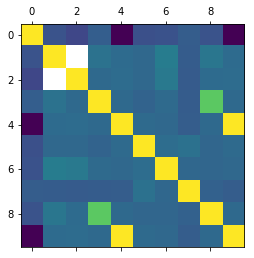

In [31]:
# plot correlations on winstons_11 (w/ fraud)
# with matplotlib
plt.matshow(winston_checkable.corr())
plt.show()

In [36]:
# with pandas / numpy
df = winston_checkable
corr = df.corr()
winstons_11_correlation_matrix = corr.style.background_gradient( cmap='coolwarm' )
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
winstons_11_correlation_matrix

,fraud,has_header,has_header_bool,gts,zero_gts,fb_published,has_analytics,listed_bool,num_order,zero_num_order
fraud,1,-0.0821005,-0.143768,-0.0178745,-0.450548,-0.0991426,-0.0846265,-0.0226105,-0.0780081,-0.449741
has_header,-0.0821005,1,nan,0.0972836,0.0580982,0.0422842,0.156052,-0.0300958,0.120629,0.0578501
has_header_bool,-0.143768,nan,1,0.0465858,0.0635748,0.0402555,0.136615,-0.0361655,0.0549581,0.0640099
gts,-0.0178745,0.0972836,0.0465858,1,0.0425413,0.010243,0.0509269,-0.0284122,0.633061,0.0424803
zero_gts,-0.450548,0.0580982,0.0635748,0.0425413,1,0.0517729,0.0414812,-0.0243963,0.0472918,0.998567
fb_published,-0.0991426,0.0422842,0.0402555,0.010243,0.0517729,1,0.0704077,0.0919314,0.0269006,0.0516724
has_analytics,-0.0846265,0.156052,0.136615,0.0509269,0.0414812,0.0704077,1,0.0332748,0.027694,0.0414121
listed_bool,-0.0226105,-0.0300958,-0.0361655,-0.0284122,-0.0243963,0.0919314,0.0332748,1,-0.00127132,-0.0242469
num_order,-0.0780081,0.120629,0.0549581,0.633061,0.0472918,0.0269006,0.027694,-0.00127132,1,0.0472335
zero_num_order,-0.449741,0.0578501,0.0640099,0.0424803,0.998567,0.0516724,0.0414121,-0.0242469,0.0472335,1


In [37]:
# s = winstons_11_correlation_matrix.abs().unstack()
# so = s.sort_values(kind="quicksort")